## TAREA 1
Seleccione un algoritmo de los indicados en teoría que implemente aprendizaje semi-supervisado de cualquiera de los
paradigmas estudiados. Implemente el algoritmo.

Seleccione al menos un dataset semi-supervisado y evalúe el algoritmo implementado.

## Parámetros del ejercicio
En este bloque de código puede modificar algunos parámetros del ejercicio como, por ejemplo, las vistas de cada uno de los modelos (SVM y RF), el porcentaje de ejemplos no etiquetados o el umbral de confianza de los modelos.



In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Variables globales inicializadas con valores predeterminados
view1 = [0, 1]  # Vista para el primer modelo
view2 = [2, 3]  # Vista para el segundo modelo
porcentaje_unlabel = 0.5  # Porcentaje de los ejemplos sin etiquetar
confidence_threshold = 0.85  # Umbral de confianza

# Opciones permitidas
options = [0, 1, 2, 3]

# Crear checkboxes para view1
view1_checkboxes = [
    widgets.Checkbox(value=True if opt in [0, 1] else False, description=f'{opt}') for opt in options
]
view1_label = widgets.Label("Selecciona hasta 2 índices para el primer modelo")

# Crear checkboxes para view2
view2_checkboxes = [
    widgets.Checkbox(value=True if opt in [2, 3] else False, description=f'{opt}') for opt in options
]
view2_label = widgets.Label("Selecciona hasta 2 índices para el segundo modelo")

# Función para limitar las selecciones a 2
def limit_checkboxes(change, checkboxes):
    # Contar los seleccionados
    selected = [cb for cb in checkboxes if cb.value]
    if len(selected) > 2:
        # Desmarcar el último activado si hay más de 2 seleccionados
        change['owner'].value = False

# Vincular la función de límite a los checkboxes
for cb in view1_checkboxes:
    cb.observe(lambda change, cbs=view1_checkboxes: limit_checkboxes(change, cbs), names='value')

for cb in view2_checkboxes:
    cb.observe(lambda change, cbs=view2_checkboxes: limit_checkboxes(change, cbs), names='value')


# Slider con cuadro de texto sincronizado para porcentaje_unlabel
porcentaje_unlabel_slider = widgets.FloatSlider(
    value=porcentaje_unlabel,
    min=0.0,
    max=0.95,
    step=0.01,
    description="Porcentaje Unlabel:",
    style={'description_width': 'initial'}
)
porcentaje_unlabel_text = widgets.BoundedFloatText(
    value=porcentaje_unlabel,
    min=0.0,
    max=0.95,
    step=0.01,
    description="",
    style={'description_width': 'initial'}
)
widgets.jslink((porcentaje_unlabel_slider, 'value'), (porcentaje_unlabel_text, 'value'))
porcentaje_unlabel_comment = widgets.Label("Proporción de datos sin etiquetar (0 a 1)")

# Slider con cuadro de texto sincronizado para confidence_threshold
confidence_threshold_slider = widgets.FloatSlider(
    value=confidence_threshold,
    min=0.0,
    max=1.0,
    step=0.01,
    description="Confidence Threshold:",
    style={'description_width': 'initial'}
)
confidence_threshold_text = widgets.BoundedFloatText(
    value=confidence_threshold,
    min=0.0,
    max=1.0,
    step=0.01,
    description="",
    style={'description_width': 'initial'}
)
widgets.jslink((confidence_threshold_slider, 'value'), (confidence_threshold_text, 'value'))
confidence_threshold_comment = widgets.Label("Umbral de confianza para etiquetado automático")

# Botón para confirmar
confirm_button = widgets.Button(
    description="Confirmar",
    button_style="success"
)

# Caja de salida
output = widgets.Output()

# Función para manejar los clics y asignar valores a las variables
def on_confirm_button_clicked(b):
    global view1, view2, porcentaje_unlabel, confidence_threshold  # Declarar como global

    # Obtener los valores seleccionados de los checkboxes (True indica marcado)
    view1 = [opt for opt, cb in zip([0, 1, 2, 3], view1_checkboxes) if cb.value]
    view2 = [opt for opt, cb in zip([0, 1, 2, 3], view2_checkboxes) if cb.value]

    # Obtener los valores del slider
    porcentaje_unlabel = porcentaje_unlabel_slider.value
    confidence_threshold = confidence_threshold_slider.value

    with output:
        clear_output()
        print("Parámetros seleccionados:")
        print(f"View 1: {view1}")
        print(f"View 2: {view2}")
        print(f"Porcentaje Unlabel: {porcentaje_unlabel}")
        print(f"Confidence Threshold: {confidence_threshold}")

confirm_button.on_click(on_confirm_button_clicked)

# Mostrar los widgets
display(
    widgets.VBox([
        widgets.HBox([view1_label] + view1_checkboxes),
        widgets.HBox([view2_label] + view2_checkboxes),
        widgets.HBox([porcentaje_unlabel_slider, porcentaje_unlabel_text, porcentaje_unlabel_comment]),
        widgets.HBox([confidence_threshold_slider, confidence_threshold_text, confidence_threshold_comment]),
        confirm_button,
        output
    ])
)

## Creación del Dataset Iris para Aprendizaje SemiSupervisado (SSL)
Para modificar el dataset y poder utilizarlo con el algoritmo de SSL, lo dividimos utilizando la funcion *train_test_split()* y eliminamos la etiqueta de la parte no etiquetada.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Cargamos el dataset Iris
data = load_iris()
X = data.data
y = data.target

# Convertimos a DataFrame y a Series para que tenga la columna de indices y nos sirva posteriormente para encontrar las etiquetas correspondientes a los ejemplos no etiquetados
X = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.Series(y)

# Utilizamos la funcion train_test_split para dividir en datos etiquetados y datos sin etiquetar
X_label, X_unlabel, y_label, y_unlabel = train_test_split(X, y, test_size=porcentaje_unlabel, random_state=42)

# Eliminamos la etiqueta de la parte no etiquetada
y_unlabel_final = pd.Series(-1 * np.ones(len(X_unlabel)), index=X_unlabel.index)


In [3]:
# Mostramos los conjuntos no etiquetados y vemos que coinciden los indices
print(y_unlabel_final.head())
print(X_unlabel.head())

73    -1.0
18    -1.0
118   -1.0
78    -1.0
76    -1.0
dtype: float64
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4


In [4]:
# Concatenamos los dos dataframes y obtenemos el dataset mezclado (X_mix,y_mix) con los ejemplos etiquetados y no etiquetados
X_mix = pd.concat([X_label, X_unlabel]) # 4 columnas + index
y_mix = pd.concat((y_label, y_unlabel_final)) # 3 clases + (-1) sin etiquetar

## Visualización del Dataset

Una vez creado el dataset no supervisado, podemos reducir la dimensionalidad y mostrarlo en una gráfica en dos dimensiones.

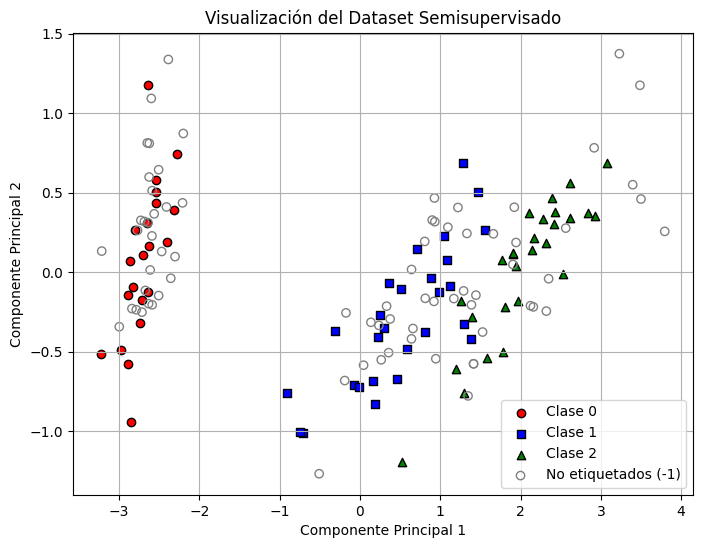

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir a 2D usando PCA para poder visualizar los datos
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_mix)

# Crear un mapa de colores para las clases etiquetadas
colors = ['red', 'blue', 'green']  # Un color por clase
markers = ['o', 's', '^']

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar las clases etiquetadas
for class_label in np.unique(y_mix[y_mix != -1]):  # Excluir la clase -1
    idx = y_mix == class_label
    plt.scatter(
        X_reduced[idx, 0], X_reduced[idx, 1],
        c=colors[int(class_label)],
        label=f'Clase {int(class_label)}',
        edgecolor='k',  # Bordes negros para diferenciarlas
        marker=markers[int(class_label) % len(markers)]  # Alternar entre marcadores
    )

# Graficar los puntos no etiquetados (clase -1) como círculos sin rellenar
idx_unlabeled = y_mix == -1
plt.scatter(
    X_reduced[idx_unlabeled, 0], X_reduced[idx_unlabeled, 1],
    facecolors='none', edgecolors='gray',  # Sin relleno, bordes grises
    label='No etiquetados (-1)', marker='o'
)

# Configurar la gráfica
plt.title('Visualización del Dataset Semisupervisado')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

También podemos reducir la dimensionalidad y verlo en 3D utilizando plotly.



In [6]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Reducir a 3D usando PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_mix)

# Separar etiquetados y no etiquetados
mask_labeled = y_mix != -1  # Etiquetados
mask_unlabeled = y_mix == -1  # No etiquetados

# Crear el gráfico interactivo
fig = go.Figure()

# Colores y marcadores para las clases etiquetadas
colors = ['red', 'blue', 'green']
symbols = ['circle', 'square', 'diamond']  # Reemplazamos 'triangle-up' por 'diamond'

# Agregar puntos etiquetados por clase
for class_label in np.unique(y_mix[mask_labeled]):
    idx = y_mix == class_label
    fig.add_trace(go.Scatter3d(
        x=X_reduced[idx, 0],
        y=X_reduced[idx, 1],
        z=X_reduced[idx, 2],
        mode='markers',
        marker=dict(
            size=2, color=colors[int(class_label)],
            symbol=symbols[int(class_label) % len(symbols)]
        ),
        name=f'Clase {int(class_label)}'
    ))

# Agregar puntos no etiquetados (-1)
fig.add_trace(go.Scatter3d(
    x=X_reduced[mask_unlabeled, 0],
    y=X_reduced[mask_unlabeled, 1],
    z=X_reduced[mask_unlabeled, 2],
    mode='markers',
    marker=dict(
        size=2, color='gray', symbol='circle-open'
    ),
    name='No etiquetados (-1)'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Visualización 3D del Dataset Semisupervisado",
    scene=dict(
        xaxis_title="Componente Principal 1",
        yaxis_title="Componente Principal 2",
        zaxis_title="Componente Principal 3"
    ),
    legend=dict(title="Clases"),
    template="plotly_white"
)

# Mostrar el gráfico
fig.show()

## Preparación de las vistas del algoritmo de CoTraining
Una vez tenemos el dataset generado, procedemos a dividirlo en dos vistas: la primera la utilizará la SVM y la segunda el modelo de RF.



In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Seleccionamos las columnas relevantes para cada vista
X_label_view1 = X_label.iloc[:, view1]  # Vista 1 (etiquetados)
X_label_view2 = X_label.iloc[:, view2]  # Vista 2 (etiquetados)

X_unlabel_view1 = X_unlabel.iloc[:, view1]  # Vista 1 (no etiquetados)
X_unlabel_view2 = X_unlabel.iloc[:, view2]  # Vista 2 (no etiquetados)

# Entrenamos a los clasificadores con los datos etiquetados
# Nota: los clasificadores de sklearn aceptan DataFrames directamente como entrada
svm_classifier = SVC(kernel='linear', probability=True)
rf_classifier = RandomForestClassifier(n_estimators=100)

# Entrenamos SVM con la Vista 1 con los datos etiquetados
svm_classifier.fit(X_label_view1, y_label)

# Entrenamos RF con la Vista 2 con los datos etiquetados
rf_classifier.fit(X_label_view2, y_label)


RandomForestClassifier()

## Visualización de las vistas de cada clasificador
En este fragmento de código, vemos las dos vistas que tienen cada uno de los clasificadores para entender cómo están "viendo" los datos cada uno de ellos.

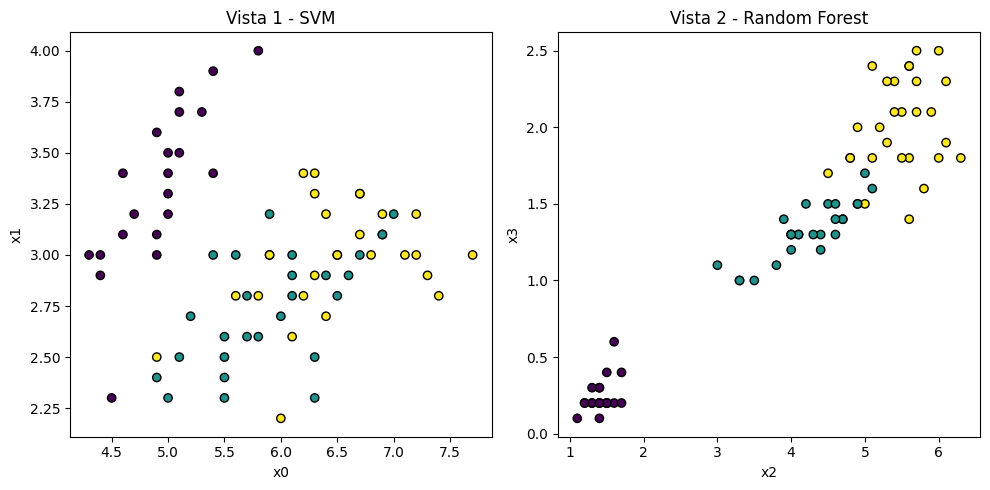

In [8]:
# Podemos representar en una grafica la vista de cada clasificador.

# representa X_label_view1 y X_label_view2
plt.figure(figsize=(10, 5))

# Vista 1
plt.subplot(1, 2, 1)
plt.scatter(X_label_view1.iloc[:, 0], X_label_view1.iloc[:, 1], c=y_label, cmap='viridis', edgecolor='k')
plt.title('Vista 1 - SVM')
plt.xlabel(f'x{view1[0]}')
plt.ylabel(f'x{view1[1]}')

# Vista 2
plt.subplot(1, 2, 2)
plt.scatter(X_label_view2.iloc[:, 0], X_label_view2.iloc[:, 1], c=y_label, cmap='viridis', edgecolor='k')
plt.title('Vista 2 - Random Forest')
plt.xlabel(f'x{view2[0]}')
plt.ylabel(f'x{view2[1]}')

plt.tight_layout()
plt.show()

## Algoritmo de CoTraining

Este fragmento de código se utiliza para aplicar el algoritmo de cotraining sobre los datos no etiquetados. Una vez tenemos los dos modelos entrenados con las dos vistas diferentes, se le pasan los datos no etiquetados para que predigan su etiqueta.


Si la predicción supera el umbral de confianza que hemos definido al principio del ejercicio, entonces se añade a los datos etiquetados del modelo contrario. Es decir, si la SVM etiqueta un dato no etiquetado, este dato se pasa al subconjunto de datos etiquetados del RandomForest y viceversa.

In [9]:
iterations = 10

y_label_view1 = y_label.copy()
y_label_view2 = y_label.copy()

SSL_indices = np.array([])  # Lista para almacenar los índices de las instancias que han sido etiquetadas y poder evaluarlas más adelante

for n in range(iterations):
    print(f"Iteración {n + 1}")

    if X_unlabel_view1.shape[0] == 0 and X_unlabel_view2.shape[0] == 0:
      # Hemos terminado porque no queda ninguna ejemplo sin etiquetar
      print("Todos los ejemplos han sido etiquetados")
      break

    # Si la vista1 esta vacia no puede predecir nada
    if X_unlabel_view1.shape[0] != 0:
    # 1. Predicciones de los clasificadores
    # SVM predice en vista 1
      svm_probabilities = pd.DataFrame(svm_classifier.predict_proba(X_unlabel_view1), index=X_unlabel_view1.index)
      svm_predictions = pd.DataFrame(svm_classifier.predict(X_unlabel_view1), index=X_unlabel_view1.index)
      svm_high_confidence = np.max(svm_probabilities, axis=1) > confidence_threshold
    # 2. Identificar ejemplos confiables
      svm_confident_indices = np.where(svm_high_confidence)[0]  # Obtener los índices de las instancias con alta confianza
      # 4. Etiquetas y datos confiables de SVM (Vista 1)
      new_svm_labels = pd.Series(svm_predictions.iloc[svm_confident_indices].values.flatten(), index=svm_predictions.iloc[svm_confident_indices].index)
      new_svm_data_view2 = X_unlabel_view2.iloc[svm_confident_indices, :]

    # Si la vista 2 esta vacía, no puede predecir nada
    if X_unlabel_view2.shape[0] != 0:
    # RF predice en vista 2
      rf_probabilities = pd.DataFrame(rf_classifier.predict_proba(X_unlabel_view2), index=X_unlabel_view2.index)
      rf_predictions = pd.DataFrame(rf_classifier.predict(X_unlabel_view2), index=X_unlabel_view2.index)
      rf_high_confidence = np.max(rf_probabilities, axis=1) > confidence_threshold

      # 2. Identificar ejemplos confiables
      rf_confident_indices = np.where(rf_high_confidence)[0]  # Obtener los índices de las instancias con alta confianza

      # Etiquetas y datos confiables de RF (Vista 2)
      new_rf_labels = pd.Series(rf_predictions.iloc[rf_confident_indices].values.flatten(), index=rf_predictions.iloc[rf_confident_indices].index)
      new_rf_data_view1 = X_unlabel_view1.iloc[rf_confident_indices, :]

    # 3. Si no hay ejemplos confiables, continuar con la siguiente iteración
    if len(svm_confident_indices) == 0 and len(rf_confident_indices) == 0:
        print("No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.")
        continue

    # 5. Añadir ejemplos etiquetados
    # Incorporamos los ejemplos etiquetados por el SVM para que los use RF (Vista 2)
    X_label_view2 = pd.concat([X_label_view2, new_svm_data_view2], axis=0)  # Concatenar filas
    y_label_view2 = pd.concat([y_label_view2, new_svm_labels])  # Etiquetas para vista 2

    # Incorporamos los ejemplos etiquetados por el RF para que los use SVM (Vista 1)
    X_label_view1 = pd.concat([X_label_view1, new_rf_data_view1], axis=0)  # Concatenar filas
    y_label_view1 = pd.concat([y_label_view1, new_rf_labels])  # Etiquetas para vista 1

    # 6. Eliminar ejemplos etiquetados de las vistas no supervisadas
    mask_svm = np.isin(X_unlabel_view1.index, new_svm_data_view2.index)  # Usar índices originales
    mask_rf = np.isin(X_unlabel_view2.index, new_rf_data_view1.index)  # Usar índices originales
    mask_combined = mask_svm | mask_rf  # Combinar los índices

    # Añadir los índices a SSL_indices solo si las instancias han sido etiquetadas
    if len(svm_confident_indices) > 0:
        SSL_indices = np.concatenate((SSL_indices, new_svm_data_view2.index))

    if len(rf_confident_indices) > 0:
        SSL_indices = np.concatenate((SSL_indices, new_rf_data_view1.index))

    SSL_indices = np.unique(SSL_indices)  # Eliminar índices duplicados
    X_unlabel_view1 = X_unlabel_view1[~mask_combined]  # Eliminar ejemplos etiquetados de vista 1
    X_unlabel_view2 = X_unlabel_view2[~mask_combined]  # Eliminar ejemplos etiquetados de vista 2

    # 7. Reentrenar los clasificadores exclusivamente en su vista
    svm_classifier.fit(X_label_view1, y_label_view1)
    rf_classifier.fit(X_label_view2, y_label_view2)

print("Co-Training completado.")


# Ahora tenemos X_label_view1, X_label_view2 y X_unlabel_view1, X_unlabel_view2 (datos que no han sido posible etiquetar)
# Por otro lado tenemos y_label_view1, y_label_view2 y las correspondientes etiquetas que no han sido etiquetadas.

Iteración 1
Iteración 2
Iteración 3
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 4
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 5
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 6
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 7
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 8
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 9
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Iteración 10
No se encontraron ejemplos confiables en esta iteración. Continuando con la siguiente iteración.
Co-Training completado.


Algunos ejemplos no superan el umbral de confianza que hemos establecido y los visualizamos en esta parte para saber cuántos no ha podido etiquetar.

In [10]:
# Los datos que no han conseguido ser etiquetados son:
print(f"Numero de datos no etiquetados por la SVM: {X_unlabel_view1.shape}")
print(f"Numero de datos no etiquetados por el RF: {X_unlabel_view2.shape}")

# Sacamos los indices de las instancias que no han sido etiquetadas
# Concatenamos evitando repeticiones
no_label = np.unique(np.concatenate((X_unlabel_view1.index, X_unlabel_view2.index)))

# Buscamos esos indices en X
X_unlabel_not_labeled = X.iloc[no_label]

## Agrupamos las dos vistas que sí han sido etiquetadas
yes_label = np.unique(np.concatenate((X_label_view1.index, X_label_view2.index)))
y_label_labeled = y.iloc[yes_label]

# Buscamos esos indices en X
X_label_labeled = X.iloc[yes_label]
y_no_label = pd.Series(y_mix[no_label], index=y_mix.index).dropna()

Numero de datos no etiquetados por la SVM: (5, 2)
Numero de datos no etiquetados por el RF: (5, 2)


Por último, construimos el dataset final que hemos conseguido etiquetar junto con los datos que no hemos podido etiquetar

In [11]:
# Agrupamos los nuevos datos etiquetados con los que no lo han sido
X_final = pd.concat([X_label_labeled, X_unlabel_not_labeled], axis=0)
y_final = pd.concat([y_label_labeled, pd.Series(y_mix[no_label], index=y_mix.index)], axis=0)

In [12]:
# Eliminamos posibles valores NaN de y_final
y_final = y_final.dropna()

In [13]:
# Ordenamos las matrices finales para poder representarlas correctamente ya que los ndarrays de numpy son sensibles al orden, mientras que los DataFrames de Pandas pueden tener el índice que quieran
X_final.sort_index(inplace=True)
y_final.sort_index(inplace=True)

## Visualización de resultados
Utilizando la gráfica que hemos visto anteriormente, podemos ver qué ejemplos hemos conseguido etiquetar (estrellas) y cuales no (puntos grises)

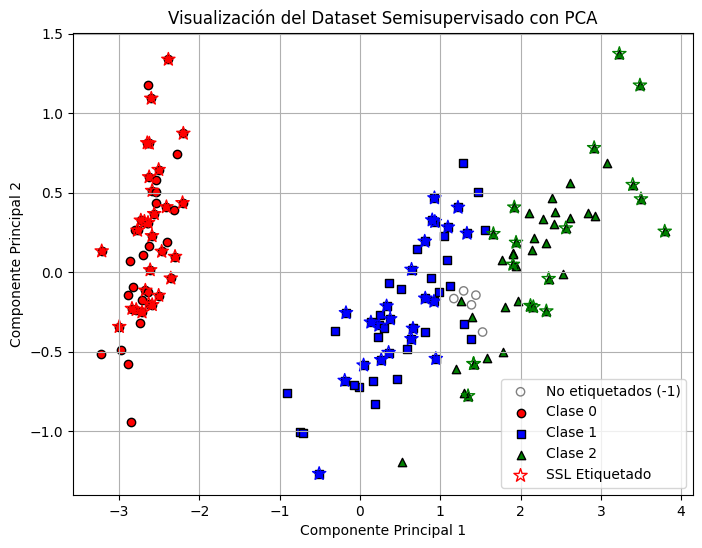

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Reducir a 2D usando PCA
pca = PCA(n_components=2)

# Asegurarse de que X_final y y_final son DataFrames/Series
X_final_values = X_final.copy()
y_final_values = y_final.copy()

# Realizamos la transformación PCA para reducir la dimensionalidad
X_final_pca = pca.fit_transform(X_final_values)

# Crear un mapa de colores y marcadores para las clases etiquetadas
colors = ['red', 'blue', 'green', 'gray']  # Un color por clase
markers = ['o', 's', '^']  # Círculo, cuadrado, triángulo, sin relleno

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar las clases etiquetadas (las instancias de X_final)
for label in np.unique(y_final_values):  # Recorremos las clases etiquetadas
    if label != -1:  # Excluir la clase -1
        class_indices = np.where(y_final_values == label)[0]
        plt.scatter(
            X_final_pca[class_indices, 0], X_final_pca[class_indices, 1],
            c=colors[int(label)],  # Asignar color según la clase
            label=f'Clase {int(label)}',  # Etiqueta de la clase
            edgecolor='k',  # Bordes negros para diferenciarlas
            marker=markers[int(label) % len(markers)]  # Alternar entre marcadores
        )
    else: # para la clase de -1
        no_label_indices = np.where(y_final_values  == -1)[0]
        plt.scatter(
            X_final_pca[no_label_indices, 0], X_final_pca[no_label_indices, 1],
            facecolors='none', edgecolors='gray',  # Sin relleno, bordes grises
            label='No etiquetados (-1)', marker='o'
        )

#SSL_indices = np.array(SSL_indices[:])

for idx in SSL_indices:
    class_label = y_final_values[int(idx)]  # Obtener la clase de la instancia etiquetada
    color = colors[int(class_label)]  # Usar el valor de la clase como índice en la lista de colores

    # Graficar la estrella con el color correspondiente a la clase
    plt.scatter(
        X_final_pca[int(idx), 0], X_final_pca[int(idx), 1],
        facecolors='none', edgecolors=color,  # Bordes del color correspondiente a la clase
        label='SSL Etiquetado' if 'SSL Etiquetado' not in plt.gca().get_legend_handles_labels()[1] else "",  # Añadir solo una vez
        marker='*', s=100
    )

# Configurar la gráfica
plt.title('Visualización del Dataset Semisupervisado con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


## EVALUACIÓN DEL MODELO

Aquí veremos la misma gráfica, pero mostrando los datos reales de Iris que no han sido etiquetados con su clase real y la clase predicha por nuestro modelo de cotraining

In [15]:
pca = PCA(n_components=2)

X_mix_pca = pd.DataFrame(pca.fit_transform(X_mix), index=X_mix.index)
# Valores del DATASET con la etiqueta REAL que hemos etiquetado
X_mix_pca_SSL = X_mix_pca.loc[np.concatenate([SSL_indices, no_label])]
y_mix_SSL = pd.concat((y_label, y_unlabel))[np.concatenate([SSL_indices, no_label])] ## Valores ya etiquetados por IRIS

# Valores del DATASET que hemos etiquetado con Co-Training
X_final_pca = pd.DataFrame(pca.fit_transform(X_final), index=X_final.index)
X_final_pca_SSL = X_final_pca.loc[np.concatenate([SSL_indices, no_label])]
y_final_SSL = y_final[np.concatenate([SSL_indices, no_label])] ## Valores que ha etiquetado Co-Training

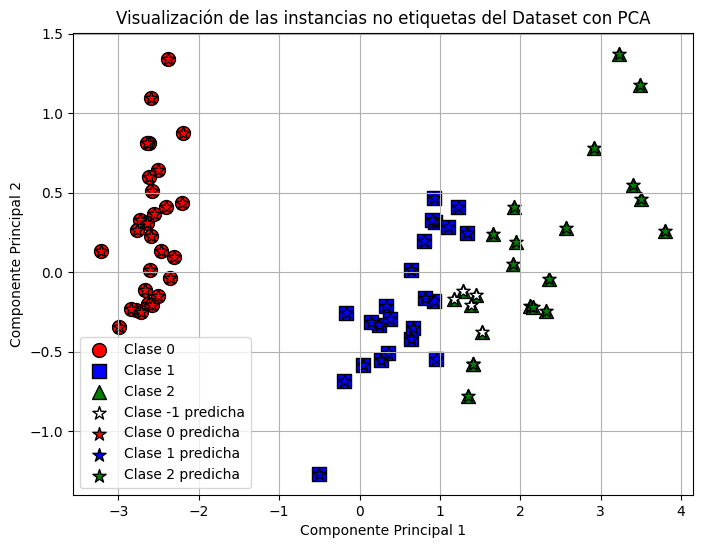

In [16]:
# Crear un mapa de colores y marcadores para las clases etiquetadas
colors = ['red', 'blue', 'green', 'white']  # Un color por clase
markers = ['o', 's', '^']  # Círculo, cuadrado, triángulo, sin relleno
# Crear el gráfico
plt.figure(figsize=(8, 6))

for label in np.unique(y_mix_SSL):  # Recorremos las clases etiquetadas de IRIS
      class_indices = np.where(y_mix_SSL == label)[0]
      plt.scatter(
            X_mix_pca_SSL.iloc[class_indices, 0], X_mix_pca_SSL.iloc[class_indices,1],
            c=colors[int(label)],  # Asignar color según la clase
            label=f'Clase {int(label)}',  # Etiqueta de la clase
            edgecolor='k',  # Bordes negros para diferenciarlas
            marker=markers[int(label) % len(markers)],
            s=100 # Alternar entre marcadores
      )

for label in np.unique(y_final_SSL):  # Recorremos las clases etiquetadas de CO-TRAINING
      class_indices = np.where(y_final_SSL == label)[0]
      plt.scatter(
            X_final_pca_SSL.iloc[class_indices, 0], X_final_pca_SSL.iloc[class_indices,1],
            c=colors[int(label)],  # Asignar color según la clase
            label=f'Clase {int(label)} predicha',  # Etiqueta de la clase
            edgecolor='k',  # Bordes negros para diferenciarlas
            marker='*', s=100
      )


# Configurar la gráfica
plt.title('Visualización de las instancias no etiquetas del Dataset con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

Las estrellas blancas indican los datos que no se han conseguido etiquetar, mientras que las estrellas de colores significan las clases predichas. Si coincide con la clase que está debajo de ella, significa que lo ha hecho correctamente, por el contrario, significa que el modelo ha fallado en esa instancia.

        Pred 0  Pred 1  Pred 2  Pred 3
True 0       0       0       0       0
True 1       0      29       0       0
True 2       0       0      23       0
True 3       5       0       0      18


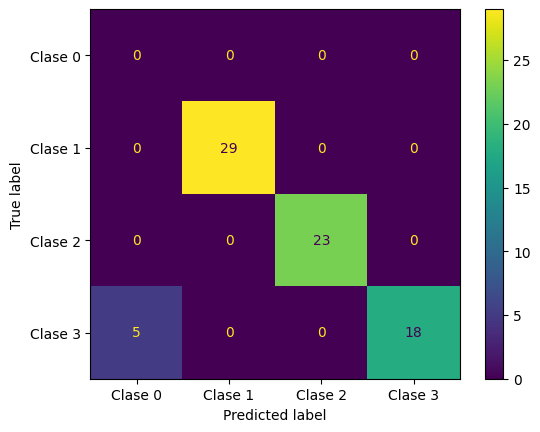

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

# Generar la matriz de confusión
cm = confusion_matrix(y_mix_SSL, y_final_SSL)

# Convertir a DataFrame para una visualización más clara
cm_df = pd.DataFrame(cm, columns=[f"Pred {i}" for i in range(cm.shape[1])],
                     index=[f"True {i}" for i in range(cm.shape[0])])

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Clase {i}" for i in range(cm.shape[0])])

# Mostrar la matriz de confusión
disp.plot()
print(cm_df)

In [18]:
from sklearn.metrics import classification_report

# Excluir la clase -1.0 de la evaluación
report = classification_report(y_mix_SSL, y_final_SSL, labels=[0.0, 1.0, 2.0])
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        23
         2.0       1.00      0.78      0.88        23

   micro avg       1.00      0.93      0.97        75
   macro avg       1.00      0.93      0.96        75
weighted avg       1.00      0.93      0.96        75



## Observaciones finales
Jugando con los parámetros se puede ver que, aún bajándole el umbral de confianza al mínimo, los modelos son capaces de acertar el 100% de los ejemplos no etiquetados.

Esto puede significar que el dataset es demasiado simple y, probablemente, con un solo modelo de SSL podríamos etiquetar las instancias no etiquetadas.

Por el contrario, si se le aumenta el umbral de confianza, existen instancias no etiquetadas que no es capaz de etiquetar y, por tanto, quedan con la etiqueta (-1). Sin embargo, las etiquetas que consigue predecir las hace correctamente y no falla en ninguna.